# PROBLEM STATEMENT 1 
Good - Current(1) , Bad - Charged off(0)

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"E:\SYMBIOSIS STATISTICAL INSTITUTE\Assignments\SLDM\Credit_cleaned_prob1.csv")

In [3]:
df

,Column1,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,loan_status,grade,dti,delinq_2yrs,fico_range_low,fico_range_high,fico_avg,purpose,tot_cur_bal,tot_hi_cred_lim,revol_util
0,0,20000,17.93,1 year,MORTGAGE,44304.0,0,E,18.47,0,690,694,692.0,debt_consolidation,NaN,NaN,97.8
1,1,30000,11.99,10+ years,MORTGAGE,136000.0,1,C,20.63,3,670,674,672.0,debt_consolidation,69594.0,116075.0,40.7
2,4,5000,8.49,10+ years,MORTGAGE,88000.0,1,B,5.32,0,660,664,662.0,debt_consolidation,77053.0,104310.0,92.6
3,5,16150,30.74,10+ years,RENT,38500.0,0,F,33.73,0,660,664,662.0,debt_consolidation,46857.0,64635.0,55.8
4,6,18400,14.08,8 years,RENT,40000.0,1,C,19.11,0,680,684,682.0,debt_consolidation,21706.0,49719.0,39.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,24990,15000,16.99,9 years,RENT,50500.0,1,D,28.15,0,670,674,672.0,debt_consolidation,41093.0,57246.0,78.7
14616,24992,12000,16.99,10+ years,MORTGAGE,49800.0,1,D,7.62,1,670,674,672.0,small_business,167935.0,183723.0,23.2
14617,24993,6400,14.08,2 years,RENT,43000.0,1,C,20.40,0,670,674,672.0,debt_consolidation,11678.0,23546.0,65.7
14618,24998,12200,13.49,NaN,OWN,44400.0,1,C,10.59,0,695,699,697.0,debt_consolidation,13615.0,22500.0,59.6


In [4]:
df_1 = df.drop(['purpose','fico_range_low', 'fico_range_high','emp_length'], axis=1)

In [5]:
null_cnt = df_1.isnull().sum()
null_cnt

Column1              0
loan_amnt            0
int_rate             0
home_ownership       0
annual_inc           0
loan_status          0
grade                0
dti                  9
delinq_2yrs          0
fico_avg             0
tot_cur_bal        146
tot_hi_cred_lim    146
revol_util           7
dtype: int64

In [6]:
df_1.dropna(axis=0,inplace=True)

In [7]:
 df_1.isnull().sum()

Column1            0
loan_amnt          0
int_rate           0
home_ownership     0
annual_inc         0
loan_status        0
grade              0
dti                0
delinq_2yrs        0
fico_avg           0
tot_cur_bal        0
tot_hi_cred_lim    0
revol_util         0
dtype: int64

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14458 entries, 1 to 14619
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Column1          14458 non-null  int64  
 1   loan_amnt        14458 non-null  int64  
 2   int_rate         14458 non-null  float64
 3   home_ownership   14458 non-null  object 
 4   annual_inc       14458 non-null  float64
 5   loan_status      14458 non-null  int64  
 6   grade            14458 non-null  object 
 7   dti              14458 non-null  float64
 8   delinq_2yrs      14458 non-null  int64  
 9   fico_avg         14458 non-null  float64
 10  tot_cur_bal      14458 non-null  float64
 11  tot_hi_cred_lim  14458 non-null  float64
 12  revol_util       14458 non-null  float64
dtypes: float64(7), int64(4), object(2)
memory usage: 1.5+ MB


In [9]:
mapping_dict = {"grade":{"A": 1,"B": 2,"C": 3,"D": 4,"E": 5,"F": 6,"G": 7}}

In [10]:
df_1=df_1.replace(mapping_dict)
df_1

,Column1,loan_amnt,int_rate,home_ownership,annual_inc,loan_status,grade,dti,delinq_2yrs,fico_avg,tot_cur_bal,tot_hi_cred_lim,revol_util
1,1,30000,11.99,MORTGAGE,136000.0,1,3,20.63,3,672.0,69594.0,116075.0,40.7
2,4,5000,8.49,MORTGAGE,88000.0,1,2,5.32,0,662.0,77053.0,104310.0,92.6
3,5,16150,30.74,RENT,38500.0,0,6,33.73,0,662.0,46857.0,64635.0,55.8
4,6,18400,14.08,RENT,40000.0,1,3,19.11,0,682.0,21706.0,49719.0,39.2
5,7,17350,12.39,MORTGAGE,55000.0,1,3,32.40,0,777.0,159069.0,194914.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,24990,15000,16.99,RENT,50500.0,1,4,28.15,0,672.0,41093.0,57246.0,78.7
14616,24992,12000,16.99,MORTGAGE,49800.0,1,4,7.62,1,672.0,167935.0,183723.0,23.2
14617,24993,6400,14.08,RENT,43000.0,1,3,20.40,0,672.0,11678.0,23546.0,65.7
14618,24998,12200,13.49,OWN,44400.0,1,3,10.59,0,697.0,13615.0,22500.0,59.6


In [11]:
nominal_columns = ["home_ownership"]
dummy_df = pd.get_dummies(df_1[nominal_columns])
df2 = pd.concat([df_1, dummy_df], axis=1)
df2 = df2.drop(nominal_columns, axis=1)
df2

,Column1,loan_amnt,int_rate,annual_inc,loan_status,grade,dti,delinq_2yrs,fico_avg,tot_cur_bal,tot_hi_cred_lim,revol_util,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
1,1,30000,11.99,136000.0,1,3,20.63,3,672.0,69594.0,116075.0,40.7,0,1,0,0
2,4,5000,8.49,88000.0,1,2,5.32,0,662.0,77053.0,104310.0,92.6,0,1,0,0
3,5,16150,30.74,38500.0,0,6,33.73,0,662.0,46857.0,64635.0,55.8,0,0,0,1
4,6,18400,14.08,40000.0,1,3,19.11,0,682.0,21706.0,49719.0,39.2,0,0,0,1
5,7,17350,12.39,55000.0,1,3,32.40,0,777.0,159069.0,194914.0,18.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,24990,15000,16.99,50500.0,1,4,28.15,0,672.0,41093.0,57246.0,78.7,0,0,0,1
14616,24992,12000,16.99,49800.0,1,4,7.62,1,672.0,167935.0,183723.0,23.2,0,1,0,0
14617,24993,6400,14.08,43000.0,1,3,20.40,0,672.0,11678.0,23546.0,65.7,0,0,0,1
14618,24998,12200,13.49,44400.0,1,3,10.59,0,697.0,13615.0,22500.0,59.6,0,0,1,0


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14458 entries, 1 to 14619
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Column1                  14458 non-null  int64  
 1   loan_amnt                14458 non-null  int64  
 2   int_rate                 14458 non-null  float64
 3   annual_inc               14458 non-null  float64
 4   loan_status              14458 non-null  int64  
 5   grade                    14458 non-null  int64  
 6   dti                      14458 non-null  float64
 7   delinq_2yrs              14458 non-null  int64  
 8   fico_avg                 14458 non-null  float64
 9   tot_cur_bal              14458 non-null  float64
 10  tot_hi_cred_lim          14458 non-null  float64
 11  revol_util               14458 non-null  float64
 12  home_ownership_ANY       14458 non-null  uint8  
 13  home_ownership_MORTGAGE  14458 non-null  uint8  
 14  home_ownership_OWN    

In [13]:
X=df2.drop("loan_status",axis=1)
X

,Column1,loan_amnt,int_rate,annual_inc,grade,dti,delinq_2yrs,fico_avg,tot_cur_bal,tot_hi_cred_lim,revol_util,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
1,1,30000,11.99,136000.0,3,20.63,3,672.0,69594.0,116075.0,40.7,0,1,0,0
2,4,5000,8.49,88000.0,2,5.32,0,662.0,77053.0,104310.0,92.6,0,1,0,0
3,5,16150,30.74,38500.0,6,33.73,0,662.0,46857.0,64635.0,55.8,0,0,0,1
4,6,18400,14.08,40000.0,3,19.11,0,682.0,21706.0,49719.0,39.2,0,0,0,1
5,7,17350,12.39,55000.0,3,32.40,0,777.0,159069.0,194914.0,18.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,24990,15000,16.99,50500.0,4,28.15,0,672.0,41093.0,57246.0,78.7,0,0,0,1
14616,24992,12000,16.99,49800.0,4,7.62,1,672.0,167935.0,183723.0,23.2,0,1,0,0
14617,24993,6400,14.08,43000.0,3,20.40,0,672.0,11678.0,23546.0,65.7,0,0,0,1
14618,24998,12200,13.49,44400.0,3,10.59,0,697.0,13615.0,22500.0,59.6,0,0,1,0


In [14]:
Y = df2['loan_status']
Y.head(10)

1     1
2     1
3     0
4     1
5     1
6     1
7     1
8     0
9     1
10    1
Name: loan_status, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000).fit(X_train,Y_train)
clf

LogisticRegression(max_iter=1000, random_state=0)

In [17]:
clf.score(X_test, Y_test)

0.8387275242047026

In [18]:
clf.score(X_train, Y_train)

0.8313197454578991

In [19]:
y_pred_log=clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       582
           1       0.84      1.00      0.91      3033

    accuracy                           0.84      3615
   macro avg       0.42      0.50      0.46      3615
weighted avg       0.70      0.84      0.77      3615



[[   0  582]
 [   1 3032]]


C:\Users\Sanika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


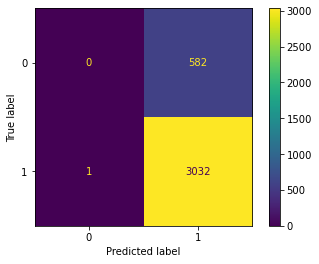

In [20]:
# confusion_matrix funnction a matrix containing the summary of predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(Y_test, y_pred_log))

# plot_confusion_matrix function is used to visualize the confusion matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(clf, X_test, Y_test)
plt.show()

In [21]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(Y_test,y_pred_log )}")

Recall Score of the classifier is: 0.9996702934388394


In [22]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_test, y_pred_log))

Accuracy :  0.8387275242047026


In [23]:
#Train  knn classifer with k=3
from sklearn.neighbors import KNeighborsClassifier

clf_2 = KNeighborsClassifier(n_neighbors=3)
clf_2.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
#Predcit xtest using Knn classifer
clf_2.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [25]:
#Accuracy of knn with k=1
clf_2.score(X_test, Y_test)

0.7881051175656985

In [26]:
clf_2.score(X_train, Y_train)

0.8625841556764733

In [27]:
y_pred_knn=clf_2.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.21      0.12      0.15       582
           1       0.84      0.92      0.88      3033

    accuracy                           0.79      3615
   macro avg       0.53      0.52      0.51      3615
weighted avg       0.74      0.79      0.76      3615



[[  67  515]
 [ 251 2782]]


C:\Users\Sanika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


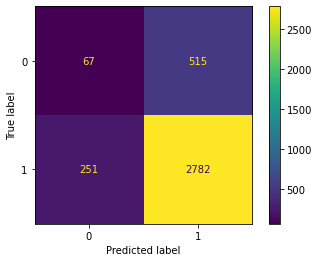

In [28]:
# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(Y_test, y_pred_knn))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(clf_2, X_test, Y_test)
plt.show()

In [29]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(Y_test,y_pred_knn )}")

Recall Score of the classifier is: 0.9172436531486977


# PROBLEM STATEMENT 2
Good - Fully paid(1) , Bad - Charged off(0)

In [47]:
data = pd.read_csv(r"E:\SYMBIOSIS STATISTICAL INSTITUTE\Assignments\SLDM\Credit_cleaned_prob2.csv")
data

,Column1,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,fico_avg,purpose,tot_cur_bal,tot_hi_cred_lim,revol_util,grade
0,0,20000,17.93,1 year,MORTGAGE,44304.0,Charged Off,18.47,0,690,694,692.0,debt_consolidation,NaN,NaN,97.8,E
1,2,21500,11.99,1 year,RENT,50000.0,Fully Paid,29.62,0,735,739,737.0,debt_consolidation,74939.0,116920.0,36.2,B
2,3,10000,13.67,NaN,RENT,64400.0,Fully Paid,16.68,3,675,679,677.0,debt_consolidation,16824.0,39547.0,57.5,C
3,5,16150,30.74,10+ years,RENT,38500.0,Charged Off,33.73,0,660,664,662.0,debt_consolidation,46857.0,64635.0,55.8,F
4,8,35000,12.79,9 years,MORTGAGE,118000.0,Fully Paid,26.66,0,665,669,667.0,credit_card,558176.0,625456.0,74.1,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,24988,4000,15.80,NaN,RENT,14988.0,Fully Paid,23.38,0,670,674,672.0,debt_consolidation,5341.0,10700.0,49.9,C
12286,24991,3000,11.44,10+ years,OWN,140500.0,Fully Paid,10.10,0,700,704,702.0,vacation,349675.0,565688.0,67.6,B
12287,24994,13925,11.67,< 1 year,RENT,31000.0,Fully Paid,21.84,0,715,719,717.0,credit_card,116364.0,129792.0,65.8,B
12288,24995,10500,10.16,5 years,MORTGAGE,78000.0,Fully Paid,9.58,0,685,689,687.0,home_improvement,243142.0,263503.0,59.5,B


In [49]:
data_1 = data.drop(['purpose','fico_range_low', 'fico_range_high','emp_length'], axis=1)

In [50]:
null = data_1.isnull().sum()
null

Column1              0
loan_amnt            0
int_rate             0
home_ownership       0
annual_inc           0
loan_status          0
dti                  1
delinq_2yrs          0
fico_avg             0
tot_cur_bal        970
tot_hi_cred_lim    970
revol_util           8
grade                0
dtype: int64

In [51]:
data_2 = data_1.drop(['tot_cur_bal', 'tot_hi_cred_lim'], axis=1)
data_2

,Column1,loan_amnt,int_rate,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,fico_avg,revol_util,grade
0,0,20000,17.93,MORTGAGE,44304.0,Charged Off,18.47,0,692.0,97.8,E
1,2,21500,11.99,RENT,50000.0,Fully Paid,29.62,0,737.0,36.2,B
2,3,10000,13.67,RENT,64400.0,Fully Paid,16.68,3,677.0,57.5,C
3,5,16150,30.74,RENT,38500.0,Charged Off,33.73,0,662.0,55.8,F
4,8,35000,12.79,MORTGAGE,118000.0,Fully Paid,26.66,0,667.0,74.1,C
...,...,...,...,...,...,...,...,...,...,...,...
12285,24988,4000,15.80,RENT,14988.0,Fully Paid,23.38,0,672.0,49.9,C
12286,24991,3000,11.44,OWN,140500.0,Fully Paid,10.10,0,702.0,67.6,B
12287,24994,13925,11.67,RENT,31000.0,Fully Paid,21.84,0,717.0,65.8,B
12288,24995,10500,10.16,MORTGAGE,78000.0,Fully Paid,9.58,0,687.0,59.5,B


In [52]:
 data_2.isnull().sum()

Column1           0
loan_amnt         0
int_rate          0
home_ownership    0
annual_inc        0
loan_status       0
dti               1
delinq_2yrs       0
fico_avg          0
revol_util        8
grade             0
dtype: int64

In [53]:
data_2.dropna(axis=0,inplace=True)

In [54]:
 data_2.isnull().sum()

Column1           0
loan_amnt         0
int_rate          0
home_ownership    0
annual_inc        0
loan_status       0
dti               0
delinq_2yrs       0
fico_avg          0
revol_util        0
grade             0
dtype: int64

In [62]:
mapping_dict_2 = {"grade":{"A": 1,"B": 2,"C": 3,"D": 4,"E": 5,"F": 6,"G": 7}}

In [63]:
data_2=data_2.replace(mapping_dict_2)
data_2

,Column1,loan_amnt,int_rate,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,fico_avg,revol_util,grade
0,0,20000,17.93,MORTGAGE,44304.0,Charged Off,18.47,0,692.0,97.8,5
1,2,21500,11.99,RENT,50000.0,Fully Paid,29.62,0,737.0,36.2,2
2,3,10000,13.67,RENT,64400.0,Fully Paid,16.68,3,677.0,57.5,3
3,5,16150,30.74,RENT,38500.0,Charged Off,33.73,0,662.0,55.8,6
4,8,35000,12.79,MORTGAGE,118000.0,Fully Paid,26.66,0,667.0,74.1,3
...,...,...,...,...,...,...,...,...,...,...,...
12285,24988,4000,15.80,RENT,14988.0,Fully Paid,23.38,0,672.0,49.9,3
12286,24991,3000,11.44,OWN,140500.0,Fully Paid,10.10,0,702.0,67.6,2
12287,24994,13925,11.67,RENT,31000.0,Fully Paid,21.84,0,717.0,65.8,2
12288,24995,10500,10.16,MORTGAGE,78000.0,Fully Paid,9.58,0,687.0,59.5,2


In [65]:
mapping_dict_3 = {"loan_status":{"Charged Off":0, "Fully Paid":1}}

In [67]:
data_2=data_2.replace(mapping_dict_3)
data_2

,Column1,loan_amnt,int_rate,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,fico_avg,revol_util,grade
0,0,20000,17.93,MORTGAGE,44304.0,0,18.47,0,692.0,97.8,5
1,2,21500,11.99,RENT,50000.0,1,29.62,0,737.0,36.2,2
2,3,10000,13.67,RENT,64400.0,1,16.68,3,677.0,57.5,3
3,5,16150,30.74,RENT,38500.0,0,33.73,0,662.0,55.8,6
4,8,35000,12.79,MORTGAGE,118000.0,1,26.66,0,667.0,74.1,3
...,...,...,...,...,...,...,...,...,...,...,...
12285,24988,4000,15.80,RENT,14988.0,1,23.38,0,672.0,49.9,3
12286,24991,3000,11.44,OWN,140500.0,1,10.10,0,702.0,67.6,2
12287,24994,13925,11.67,RENT,31000.0,1,21.84,0,717.0,65.8,2
12288,24995,10500,10.16,MORTGAGE,78000.0,1,9.58,0,687.0,59.5,2


In [68]:
nominal_columns_2 = ["home_ownership"]
dummy_df = pd.get_dummies(data_2[nominal_columns_2])
df3 = pd.concat([data_2, dummy_df], axis=1)
df3 = df3.drop(nominal_columns, axis=1)
df3

,Column1,loan_amnt,int_rate,annual_inc,loan_status,dti,delinq_2yrs,fico_avg,revol_util,grade,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0,20000,17.93,44304.0,0,18.47,0,692.0,97.8,5,1,0,0,0,0
1,2,21500,11.99,50000.0,1,29.62,0,737.0,36.2,2,0,0,0,0,1
2,3,10000,13.67,64400.0,1,16.68,3,677.0,57.5,3,0,0,0,0,1
3,5,16150,30.74,38500.0,0,33.73,0,662.0,55.8,6,0,0,0,0,1
4,8,35000,12.79,118000.0,1,26.66,0,667.0,74.1,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,24988,4000,15.80,14988.0,1,23.38,0,672.0,49.9,3,0,0,0,0,1
12286,24991,3000,11.44,140500.0,1,10.10,0,702.0,67.6,2,0,0,0,1,0
12287,24994,13925,11.67,31000.0,1,21.84,0,717.0,65.8,2,0,0,0,0,1
12288,24995,10500,10.16,78000.0,1,9.58,0,687.0,59.5,2,1,0,0,0,0


In [69]:
X_1=df3.drop("loan_status",axis=1)
X_1

,Column1,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_avg,revol_util,grade,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0,20000,17.93,44304.0,18.47,0,692.0,97.8,5,1,0,0,0,0
1,2,21500,11.99,50000.0,29.62,0,737.0,36.2,2,0,0,0,0,1
2,3,10000,13.67,64400.0,16.68,3,677.0,57.5,3,0,0,0,0,1
3,5,16150,30.74,38500.0,33.73,0,662.0,55.8,6,0,0,0,0,1
4,8,35000,12.79,118000.0,26.66,0,667.0,74.1,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,24988,4000,15.80,14988.0,23.38,0,672.0,49.9,3,0,0,0,0,1
12286,24991,3000,11.44,140500.0,10.10,0,702.0,67.6,2,0,0,0,1,0
12287,24994,13925,11.67,31000.0,21.84,0,717.0,65.8,2,0,0,0,0,1
12288,24995,10500,10.16,78000.0,9.58,0,687.0,59.5,2,1,0,0,0,0


In [70]:
Y_1 = df3['loan_status']
Y_1.head(10)

0    0
1    1
2    1
3    0
4    1
5    1
6    1
7    1
8    1
9    0
Name: loan_status, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_1, Y_1, test_size=0.25)

In [72]:
from sklearn.linear_model import LogisticRegression

clf_3 = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000).fit(X_train1,Y_train1)
clf_3

LogisticRegression(max_iter=1000, random_state=0)

In [73]:
clf_3.score(X_test1, Y_test1)

0.7909475740801042

In [78]:
clf_3.score(X_train1, Y_train1)

0.7927252985884907

In [74]:
y_pred1_log=clf_3.predict(X_test1)
from sklearn.metrics import classification_report
print(classification_report(Y_test1,y_pred1_log))

              precision    recall  f1-score   support

           0       0.46      0.06      0.10       636
           1       0.80      0.98      0.88      2435

    accuracy                           0.79      3071
   macro avg       0.63      0.52      0.49      3071
weighted avg       0.73      0.79      0.72      3071



[[  35  601]
 [  41 2394]]


C:\Users\Sanika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


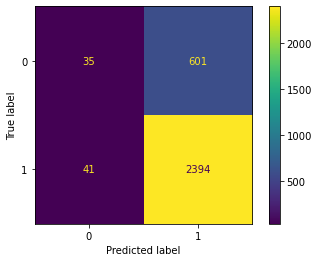

In [75]:
# confusion_matrix funnction a matrix containing the summary of predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(Y_test1, y_pred1_log))

# plot_confusion_matrix function is used to visualize the confusion matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(clf_3, X_test1, Y_test1)
plt.show()

In [76]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(Y_test1,y_pred1_log )}")

Recall Score of the classifier is: 0.9831622176591376


In [77]:
#Train  knn classifer with k=3
from sklearn.neighbors import KNeighborsClassifier

clf_4 = KNeighborsClassifier(n_neighbors=3)
clf_4.fit(X_train1, Y_train1)

KNeighborsClassifier(n_neighbors=3)

In [79]:
clf_4.score(X_test1, Y_test1)

0.7261478345815695

In [80]:
clf_4.score(X_train1, Y_train1)

0.8403908794788274

In [81]:
y_pred1_knn=clf_4.predict(X_test1)
from sklearn.metrics import classification_report
print(classification_report(Y_test1,y_pred1_knn))

              precision    recall  f1-score   support

           0       0.23      0.14      0.17       636
           1       0.80      0.88      0.84      2435

    accuracy                           0.73      3071
   macro avg       0.51      0.51      0.50      3071
weighted avg       0.68      0.73      0.70      3071



[[  87  549]
 [ 292 2143]]


C:\Users\Sanika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


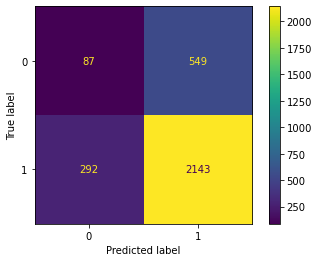

In [82]:
# confusion_matrix funnction a matrix containing the summary of predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(Y_test1, y_pred1_knn))

# plot_confusion_matrix function is used to visualize the confusion matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(clf_4, X_test1, Y_test1)
plt.show()

In [83]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(Y_test1,y_pred1_knn )}")

Recall Score of the classifier is: 0.8800821355236139
